<a href="https://colab.research.google.com/github/bbberylll/ESAA/blob/main/F07_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH.5.1 _ 회귀 소개

회귀 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
식 : Y = W1*X1 + W2*X2 + W3*X3 +...
- Y는 종속변수, X는 독립변수, W는 독립변수의 값에 영향을 미치는 회귀계수
- 머신러닝 관점에서 보면 X는 피처, Y는 결정 값이다.


회귀분석의 핵심 = 주어진 피처와 결정 값 데이터에 기반으로 학습을 통해 최적의 회귀 계수를 찾아내는 것

회귀 유형 : 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 나뉨

독립변수 개수 1개 = 단일 회귀    // 여러개 = 다중 회귀
회귀 계수의 결합이 선형 = 선형 회귀  // 비선형 결합  = 비선형 회귀

지도 학습은 두 가지 유형으로 나뉘는데 분류와 회귀
가장 큰 차이는 예측값의 유형이 이산형(분류), 연속형(회귀)

선형회귀는 실제 값과 예측값의 차이 (오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식

선형 회귀 모델은 Regularization 방법*에 따라 종류가 나뉨.

1. 일반 선형 회귀   2. 릿지   3. 라쏘  4. 엘라스틱넷   5. 로지스틱 회귀  이다.
*규제 : 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것


## CH.5.2 _ 단순 선형 회귀를 통한 회귀 이해
단순 선형 회귀는 독립변수와 종속변수 모두 하나인 선형 회귀

Y = w0 + w1*x1
예측값 ^Y = w0+w1*X
*w0= intercept(절편)  / w1 = 기울기  >> 이 둘이 회귀 계수이다.
실제 값 Y=w0+w1*X + e(잔차)


> 실제값-예측값 = e(잔차) >> 이 잔차의 합이 최소가 되는 모델을 만드는 것이 최적의 회귀 모델을 만든다는 의미

> 잔차는 음수, 양수가 모두 되기 때문에 단순히 더하는 방식으로는 완벽한 반영이 불가능

이 때 취하는 방식에 따라 종류가 나뉨.
- 일반적으로는 RSS 방식*을 사용하지만, 오류의 절댓값 합을 더하는 방식도 있음


## CH.5.3 _ 비용 최소화 하기 _ 경사하강법* 소개
*경사 하강법 = Gradient Descent

비용함수가 최소가 되는 w 파라미터를 구하는 방법이 경사 하강법

* 경사 하강법 : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이터 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
* 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의차 이가 작아지는 방향성을 가지고 W 파라미터를 지속적으로 보정해나감 → 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적의 파라미터로 반환

경사하강법 과정
1. 최초 w에서 미분을 적용해 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트
2. 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그 때의 w를 반환

### 요약
1. Step 1 : 임의의 값으로 첫 비용함수의 값 계산
2. Step 2 : 편미분 결과값에 학습률(보정계수)를 곱한 것을 마이너스하면서 계산하여 이전 값 업데이트
3. Step 3: 비용함수 값이 최소가 될 때 반복을 중지, 최적 파라미터 구함

* 경사 하강법의 단점 : 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하기 때문에, 수행 시간이 매우 오래 걸림.
→ 확률적 경사 하강법 (Stochastic Gradient Descent) 사용

: 전체 입력 데이터로 업데이트하는 것이 아닌, 일부 데이터만 이용해 w가 업데이트되는 값을 계산 → 경사하강법보다 빠른 속도 보장
⇒ 대용량의 데이터를 처리할 때에는 주로 확률적 경사 하강법 이용

피처가 여러 개인 경우 회귀 계수 도출


## CH.5.4 _ LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares
LinearRegression 클래스 : 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
  입력 파라미터
    1. fit_intercept : 불린 값, 절편을 계산할 지 말지 결정
    2. normalize : 불린 값, 회귀 수행 전, 데이터 세트를 정규화 할지

  속성
    1. coef : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성 Shape는 (Target 값 개수, 피처 개수)
    2. intercept_ : 절편 값

  다중 공산성
    : 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 민감해지는 현상. 독립적이고 중요한 피처만 남기고 제거하거나 규제를 적용하면 됨 + PCA(주성분분석)을 통해 차원 축소도 고려


### 회귀 평가 지표
평가 지표
1. MAE : 평균 절대 오차, 실제 값과 예측 값의 차이를 절댓갑승로 변화내 평균한 것
2. MSE : 평균 제곱 오차, 실제 값과 예측값의 차이를 제곱해 평균한 것
3. RMSE : MSE값에 루트를 씌운 값
4. R2 : 실제 값의 분산 대비 예측값의 분산 비율, 1에 가까울 수록 예측 정확도가 높음


## CH.5.5 _ 다항 회귀와 과적합/과소적합 이해
### 다항 회귀 이해
* 다항 회귀 : 회귀가 독립변수의 단항식이 아닌, 2차, 3차 방정식과 같은 다항식으로 표현되는 것
* 다항 회귀 역시 선형 회귀임.
* 사이킷 런의 PolynomialFeatures 클래스를 통해서 다항식 피처로 변환
  - fit(), transform() 메서드를 통해 변환 작업 수행

### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항 회귀는 복잡한 다항 관계를 모델링할 수 있음. 단, 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐 → 과적합 문제 발생


### 편향-분산 트레이드오프
Degree 1 : 고편향성 → 단순화된 모델, 지나치게 한 방향으로 치우침
Degree 15 : 고분산성 → 복잡한 모델, 지나치게 높은 변동성

1. 저편향/저분산 : 예측 결과가 실제 결과에 매우 근접, 변동이 크지도 않고 뛰어난 성능
2. 저편향/고분산 : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포 (과대적합)
3. 고편향/저분산 : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중 (과소적합)
4. 고편향/고분산 : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포

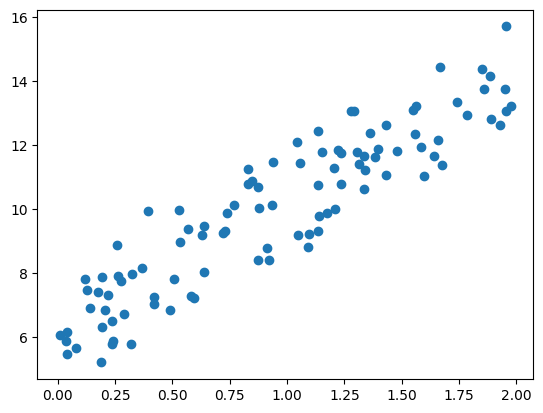

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


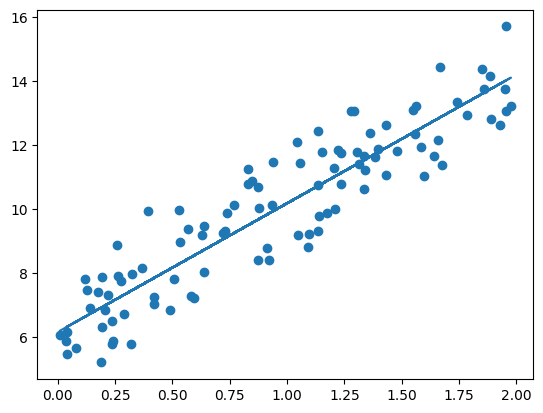

In [6]:
plt.scatter(X, y)
plt.plot(X,y_pred)

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

boston = lambda: None
boston.data = data
boston.feature_names = feature_names
boston.target = target

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


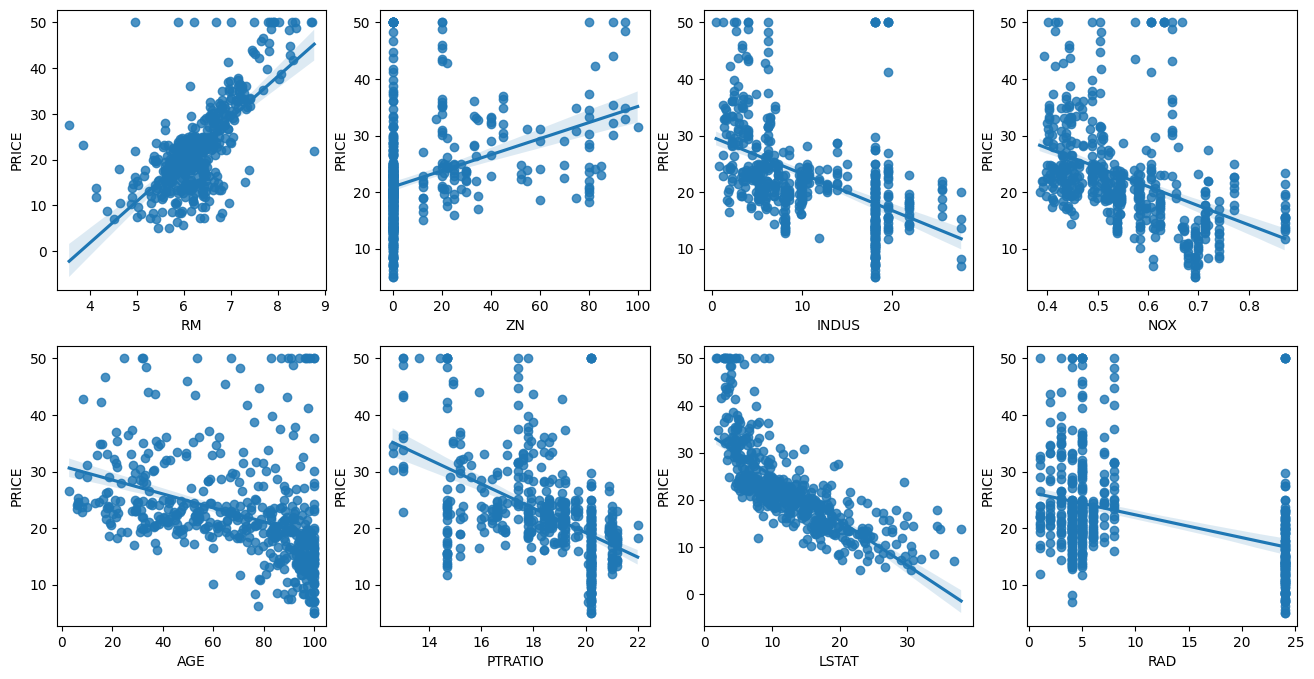

In [13]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [15]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [20]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


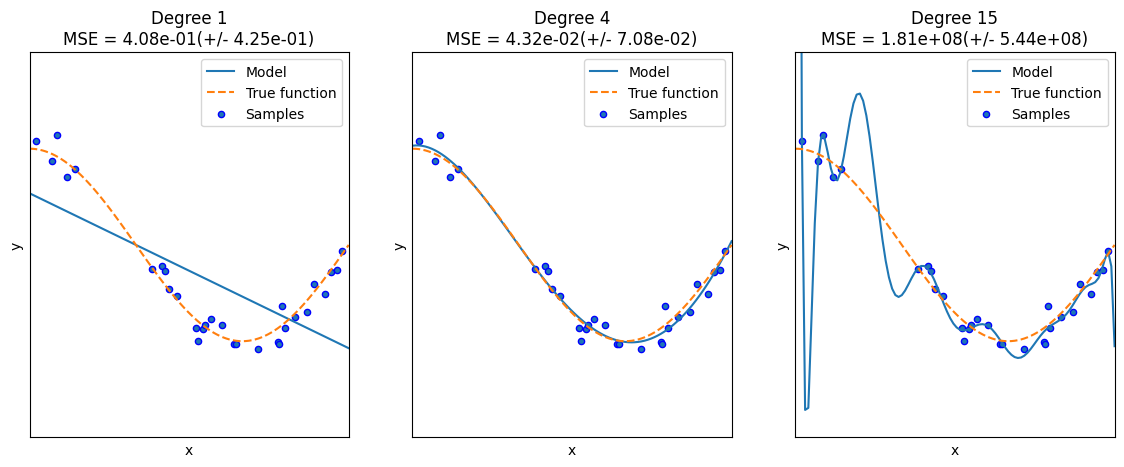

In [23]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()